<a href="https://colab.research.google.com/github/SarshaDev/GenAICookBook/blob/main/1_Introduction_to_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Retrieval-Augmented Generation (RAG)

Imagine you walk into an **exam hall**.  
You’re handed the question paper… and suddenly realize **you haven’t prepared at all**.  

What do you do?  
You try to **hallucinate** answers—writing whatever you vaguely remember or can guess.  
Sometimes you’re lucky, but most of the time, your answers are **incomplete** or **flat-out wrong**.

Large Language Models (LLMs) face a **similar problem**.  
If you ask them about something **beyond their training data**, they may confidently make things up—just like you in that exam.

---

## The Challenges

- **Outdated Knowledge**: A model only knows what it learned up to its training cutoff—it doesn’t “remember” events or facts after that.  
- **Hallucinations**: When unsure, it may fabricate information that sounds plausible but isn’t correct.  
- **No Domain-Specific Context**: General models may not know your company’s internal documents or specialized research.


---


## How Can We Fix This?

So far, you’ve learned how to **give clear instructions** to a model (prompting).  
But instructions alone can’t magically give it **new knowledge**.  
The next step is to **give the model context**—fresh, relevant information—**at the time of the question**.


---


## Enter RAG

**Retrieval-Augmented Generation (RAG)** is like being allowed to **bring a reference book into that exam**.  
Instead of guessing, you:  

1. **Retrieve**: Look up the most relevant pages from a trusted source.  
2. **Augment Generation**: Use those pages to craft an accurate, well-informed answer.  

In simple terms:  
> RAG is a technique that enhances a model's generation by retrieving the relevant information from different data sources.


---


## Origin of the Term

The **retirve-then-generate** was first introduced in "Reading wikipedia to Answer Open Domain Questions" (Chen at el., 2017), In this work, the system first retrieves the five wikipedia questions most relevant to a question, then model use, or reads, the information from these pages to generate an answer.

The term **RAG** was first introduced by **Patrick Lewis et al. (2020)** in their paper  
> *“Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks”*  

This paper proposed a solution where entire knowledge base cant be put into a model directlty.





#### **Context Construction for Foundation models is equivalent to Feature Engineering for ML Models.**



In Early days of foundation models, due to model context limits, Rag emerged as on of the common patterns.

No matter the change in limits of Model context length, There will be applications that require larger context limits than that.



## RAG Architecture


Retrieval-Augmented Generation (RAG) can be broken into **three key stages**:  
1. **Knowledge Base Generation** – Preparing and indexing the external data.  
2. **Retrieval** – Finding the most relevant information from the knowledge base.  
3. **Generation** – Using that information to craft the final answer.  

---

### Knowledge Base Generation

- **Collect Data**: Gather documents, PDFs, web pages, or domain-specific files.  
- **Chunking**: Split large documents into smaller, meaningful passages for efficient search.  
- **Embedding Creation**: Convert each chunk into a **vector representation** using an embedding model (text-embedding-ada-002, etc..)
- **Indexing**: Store these vectors in a **vector database** or **document index** (e.g., FAISS, Pinecone, Chroma, S3 Vectors) for fast similarity search.


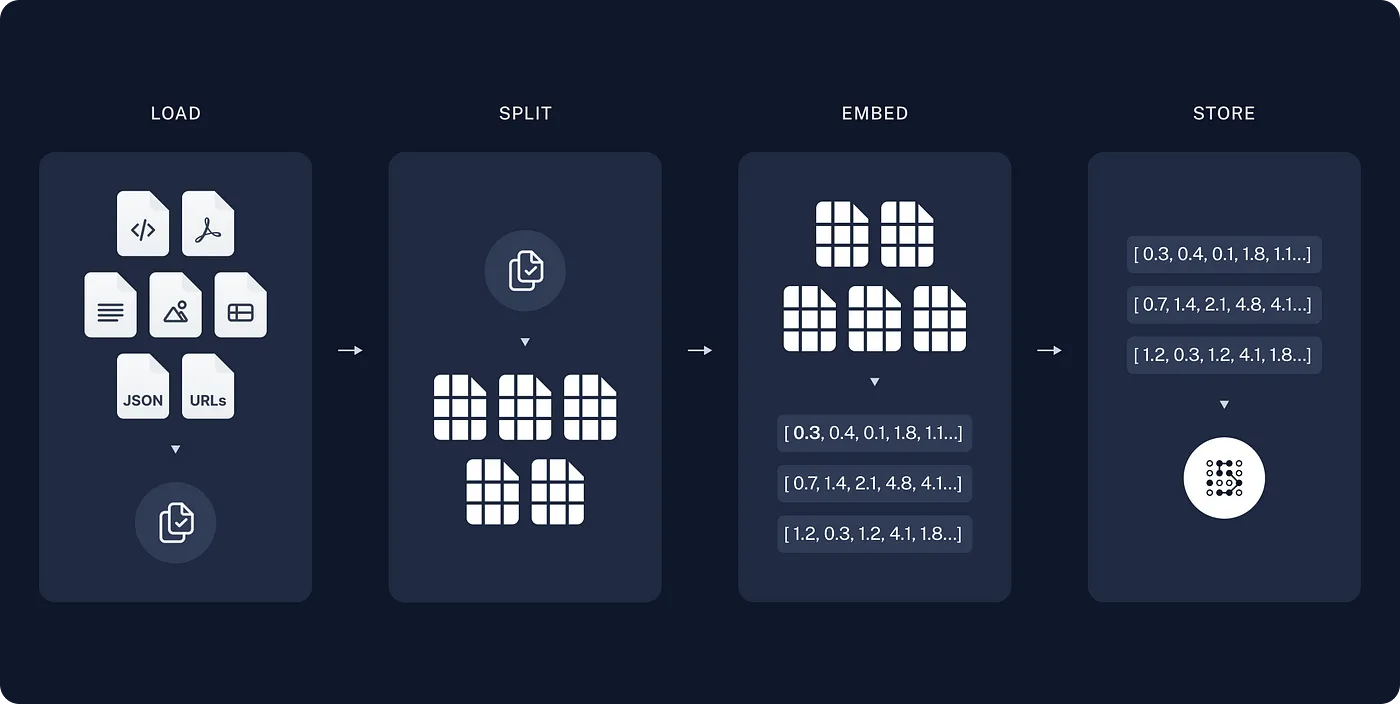

### Retrieval

The retriever takes the user's query and:  
- Converts it into a vector using the same embedding model.  
- Searches the **vector index** to find the most relevant chunks.  
- Returns the top matches as context for the generator.

### Generator

The generator (e.g., a large language model like GPT) takes:  
- The **original user query**, and  
- The **retrieved context**,  

and **augments its generation** to produce a grounded, accurate, and fluent answer.


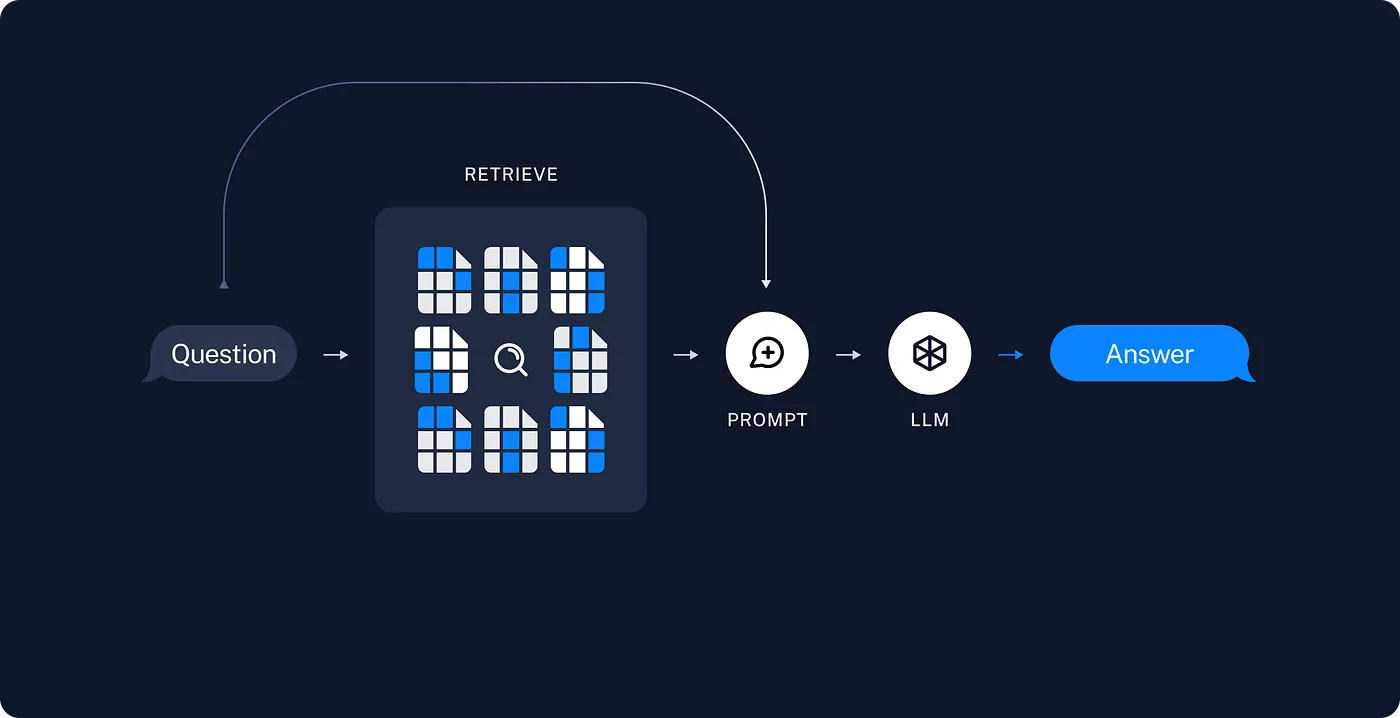

  
You have a **200-page company handbook** that employees need to query for policies.  

You have two options:  

1. **Pass the entire handbook** (or big sections of it) **directly as part of every prompt**.  
2. **Use Retrieval-Augmented Generation (RAG)** to break the handbook into chunks, store them in a vector database, and retrieve only the most relevant sections per query.
  

Which approach is better, and why?




### **Passing Content as Instructions (Long Prompts)**  
- **Pros**:  
  - Very simple to set up—no extra tools or infrastructure.  
  - No upfront cost for embedding or storage.  

- **Cons**:  
  - Every query must include the whole handbook → **huge token usage**, which is **expensive** for model calls.  
  - May exceed the model’s **context window limit**.  
  - Slow response times for long prompts.  
  - Any handbook updates require **manually changing the prompt**.

###  **Using RAG**  
- **Pros**:  
  - Only the most **relevant chunks** are retrieved per query → **lower token cost** and **faster generation**.  
  - Scales easily for **large or frequently updated** documents.  
  - Reduces hallucinations by **grounding answers** in specific text.  
  - Updates require only **re-embedding changed sections**, not rewriting prompts.  

- **Cons**:  
  - Upfront engineering effort: chunking, embedding, and indexing.  
  - Ongoing costs for **vector storage** and **retrieval queries**.  
  - Slightly increased latency compared to prompt-only (retrieval step).

---

### ✅ **Conclusion**  
For small, static content or quick tests, passing content as instructions is fine.  
But for **large, dynamic, or frequently queried documents**, **RAG** is the **cost-effective** and **scalable** choice despite its initial complexity.

-----


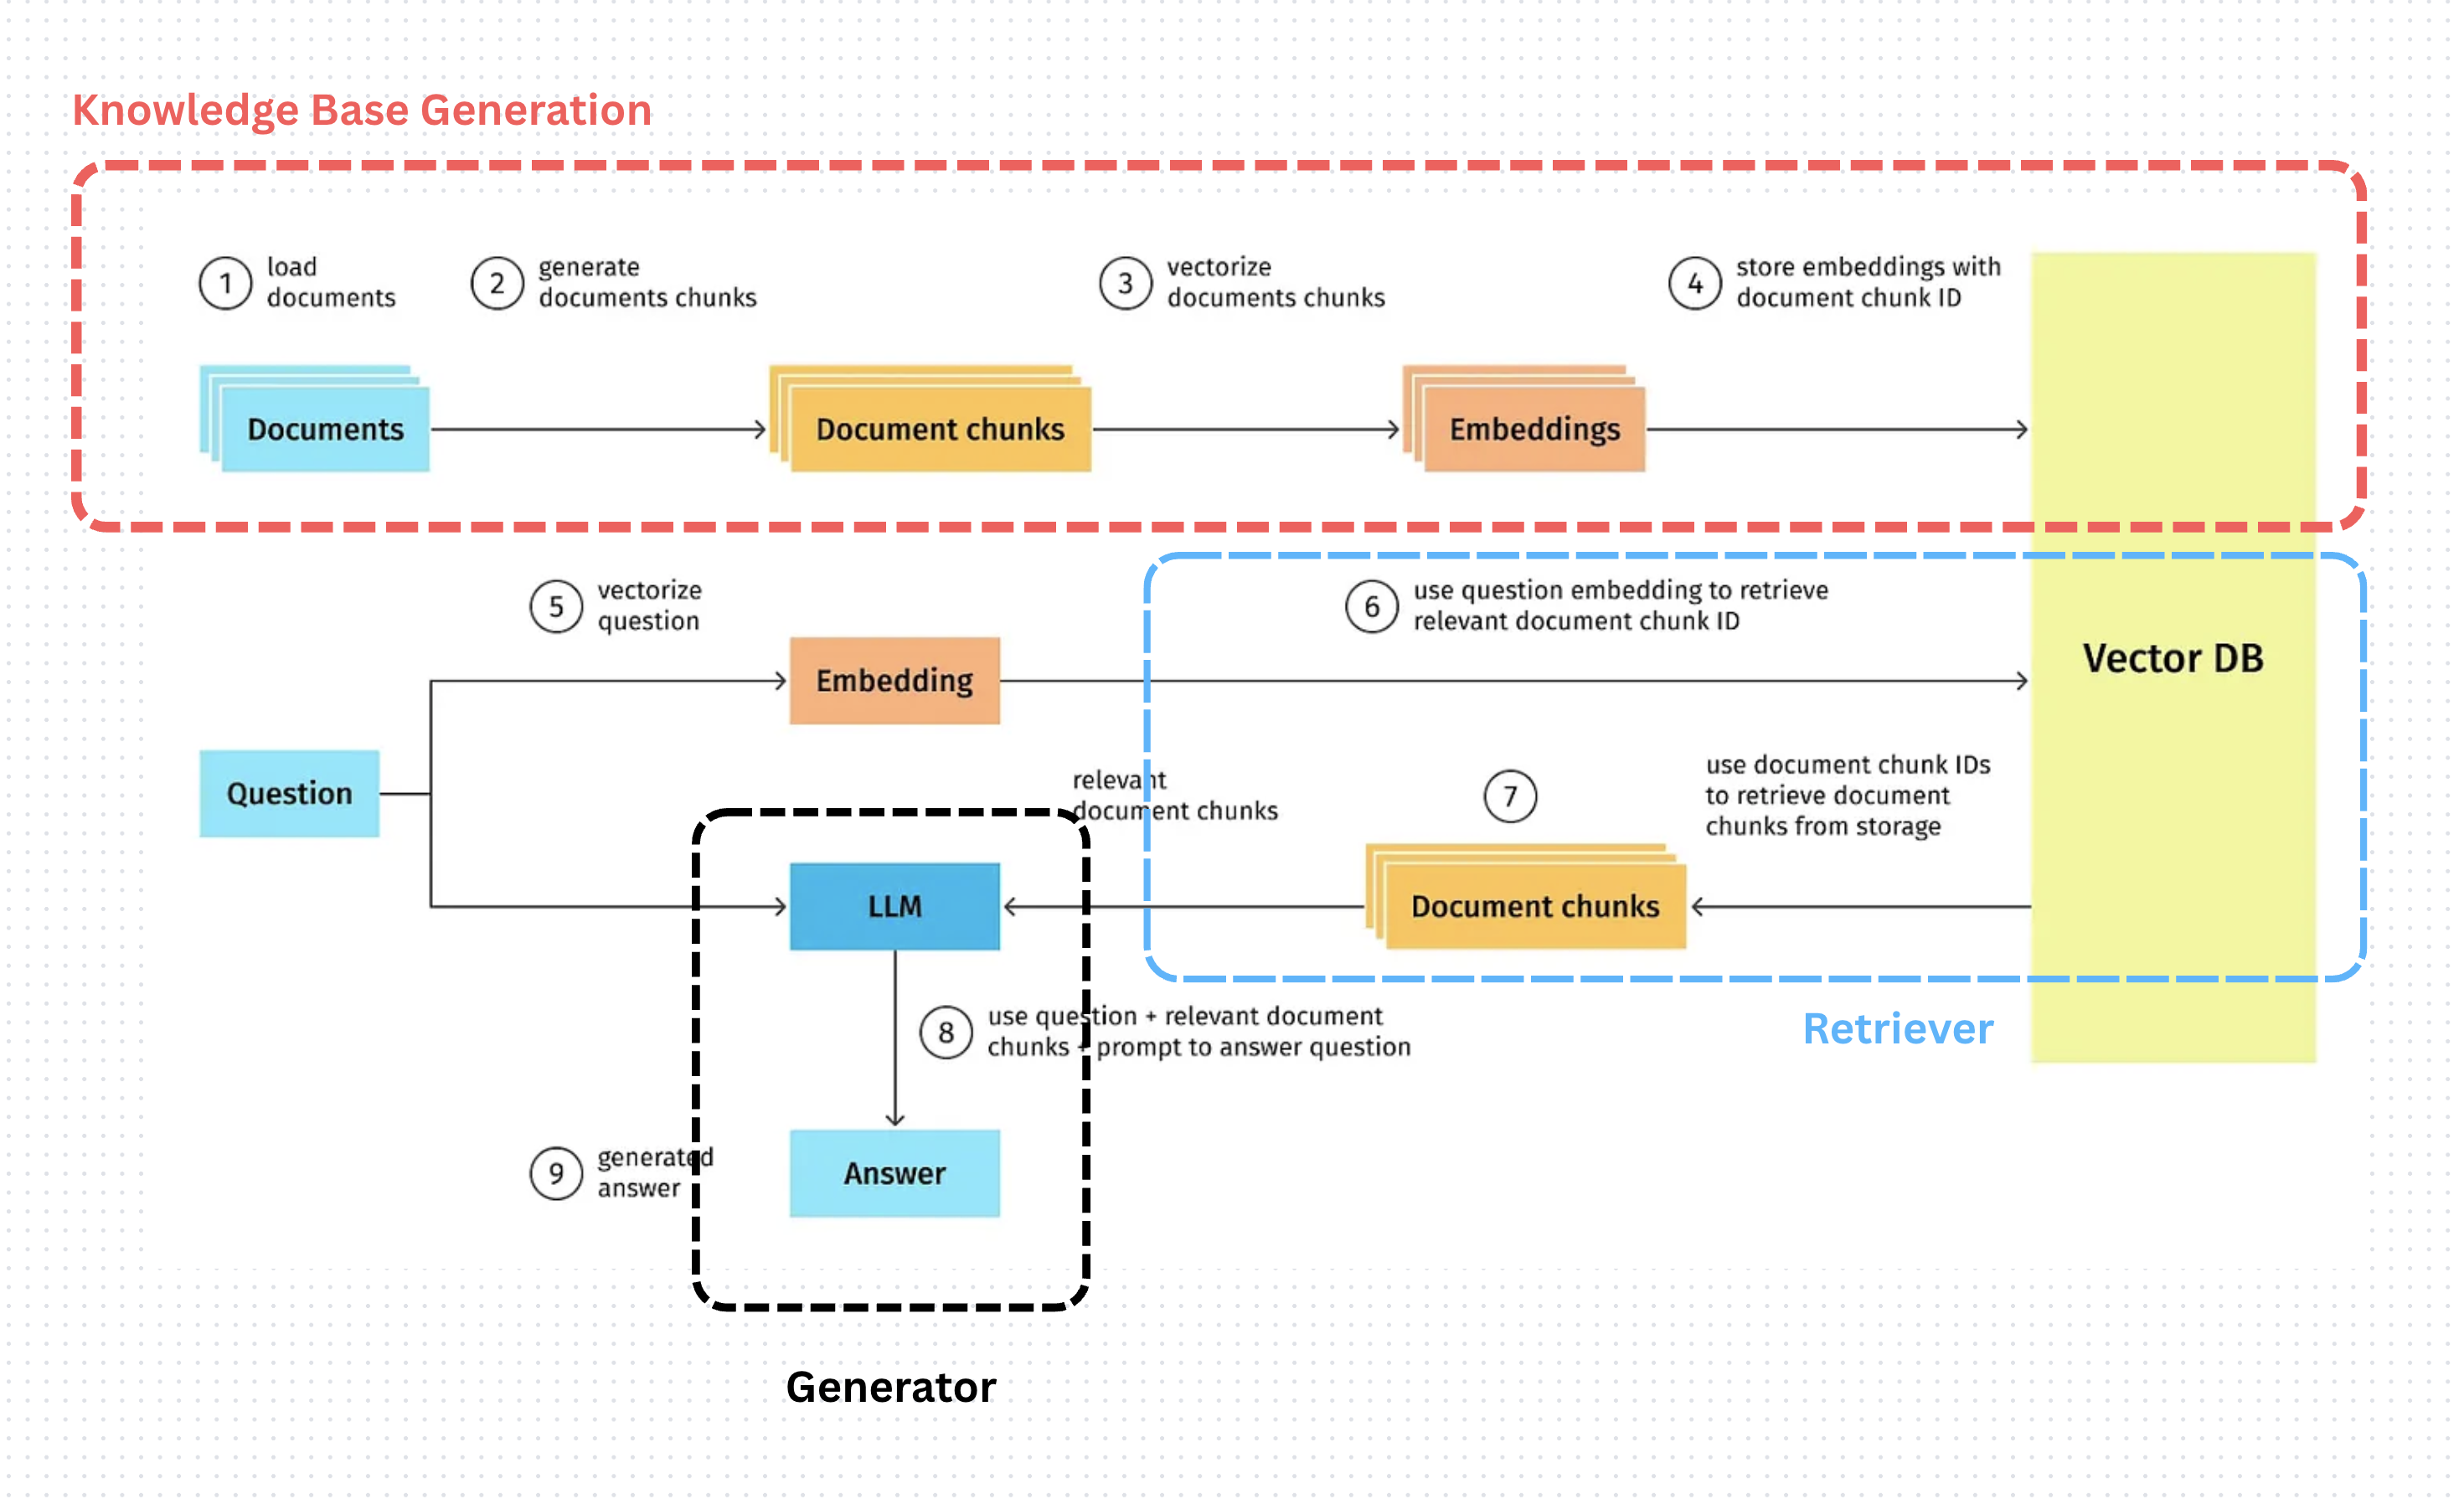

## **The success of a RAG system depends on the quality of retriever (chunking, embedding and querying )**









# *Discussion*



Imagine you're building a RAG system for a customer-support chatbot.

You've decided to:  

1. Use **the same language model** for **both embeddings** and **generation**.  
2. Use a **retrieval algorithm** (e.g., vector similarity search or TF-IDF) that's been around for decades.


Why might these choices be practical or even advantageous, even though they might *sound* unsophisticated or redundant?


